In [9]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [68]:
img = cv2.imread('ansel_adams.jpg',0)

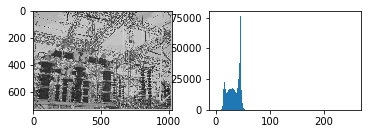

In [69]:
plt.subplot(2,2,1),plt.imshow(img,'gray')
plt.subplot(2,2,2),plt.hist(img.ravel(),256,[0,256])
plt.show()

In [70]:
#Q1&Q2

In [71]:
a = 0
b = 255
c = np.min(img)
d = np.max(img)
new_img = (img-c)*((b-a)/(d-c))+a

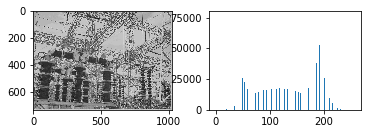

In [72]:
plt.subplot(2,2,1),plt.imshow(new_img,'gray')
plt.subplot(2,2,2),plt.hist(new_img.ravel(),256,[0,256])
plt.show()

In [73]:
#Q3 sobel算子

In [74]:
F_x = np.array([[-1,0,1],[-2,0,2],[-1,0,1]]) 
F_y = np.array([[-1,-2,-1],[0,0,0],[1,2,1]])

r, c = img.shape
new_image = np.zeros((r, c))
new_imageX = np.zeros(img.shape)
new_imageY = np.zeros(img.shape)
  
for i in range(r-2):
    for j in range(c-2):
        new_imageX[i+1, j+1] = abs(np.sum(img[i:i+3, j:j+3] * F_x))
        new_imageY[i+1, j+1] = abs(np.sum(img[i:i+3, j:j+3] * F_y))
        new_image[i+1, j+1] = (new_imageX[i+1, j+1]*new_imageX[i+1,j+1] + new_imageY[i+1, j+1]*new_imageY[i+1,j+1])**0.5
#return np.uint8(new_imageX)
#return np.uint8(new_imageY)
edges = np.uint8(new_image) # 无方向算子处理的图像
cv2.imwrite('ed.jpg',edges)
 

True

In [75]:
# sobel边缘检测
edges = cv2.Sobel(new_img,cv2.CV_16S,1,1) 
cv2.imwrite('ed.jpg',edges)

True

In [76]:
#Q4

In [77]:
L = [[0,-1,0],[-1,4,-1],[0,-1,0]]
kernel = np.array(L,np.float32)
img_blur = cv2.filter2D(new_img,-1,kernel=kernel)
cv2.imwrite('image.jpg',img_blur)

True